### Rishin Tiwari
# Resume Classifier Project

## Introduction

In today's competitive job market, the task of resume classification plays a crucial role in streamlining the recruitment process for organizations. With the advent of technology and the abundance of job applicants, automating the process of sorting and categorizing resumes based on job roles has become essential for recruiters and hiring managers. This project aims to develop a robust resume classifier that can accurately categorize resumes into predefined job categories.

## Task Overview

The dataset used in this project comprises over 2400 resumes sourced from livecareer.com. Each resume is associated with a specific job category with total of 24 Categories, including HR, Designer, Information Technology, Teacher, Advocate, and more. The primary objective is to build a machine learning model capable of accurately classifying resumes into their respective job categories.
The dataset utilized for this project was obtained from Kaggle. You can find it at: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset/data

## Approach

1. **Data Preprocessing**: The textual data extracted from the resumes undergo preprocessing steps, including tokenization, removal of stopwords, lemmatization, and vectorization using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

2. **Feature Engineering**: To extract meaningful features from the resume text, techniques such as TF-IDF vectorization are employed. This converts the text data into numerical vectors while preserving important semantic information.

3. **Model Building**: Various machine learning and deep learning algorithms are explored to build the resume classifier. The goal is to train a model that effectively learns the underlying patterns in the resume data and accurately classifies them into their respective job categories. For this project, we experimented with four different neural network architectures to optimize the performance of the resume classifier, exploring various combinations of layers.

4. **Model Evaluation**: The performance of the trained model is evaluated using metrics like accuracy, precision, recall, and F1-score. Additionally, visualization techniques such as performance grpahs, confusion matrices and classification reports are used to gain insights into the model's performance.

## Business Use Case

By successfully developing a reliable resume classifier, recruiters and hiring managers can benefit from a valuable tool for efficiently managing and organizing job applications. This contributes to a more streamlined and effective recruitment process, ultimately leading to better hiring decisions and improved organizational outcomes.


In [ ]:
### Importing Libraries and Loading the data

In [136]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing #for preprocessing text data
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer (which includes pre-processing, tokenization, and filtering out stop words)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from string import punctuation
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Concatenate, Input
from keras.models import Model

In [137]:
df = pd.read_csv("Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


### Data Preprocessing and Cleaning 

In [138]:
#Dropping the irrelevant column
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
#Renaming the comlumns
df.columns=['Resume', 'Category']
df

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [139]:
#Check Null Values in Resume Column
count = df['Resume'].isna().sum()
count

0

In [140]:
#Check Null Values in Category Column
count = df['Category'].isna().sum()
count

0

In [141]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [142]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

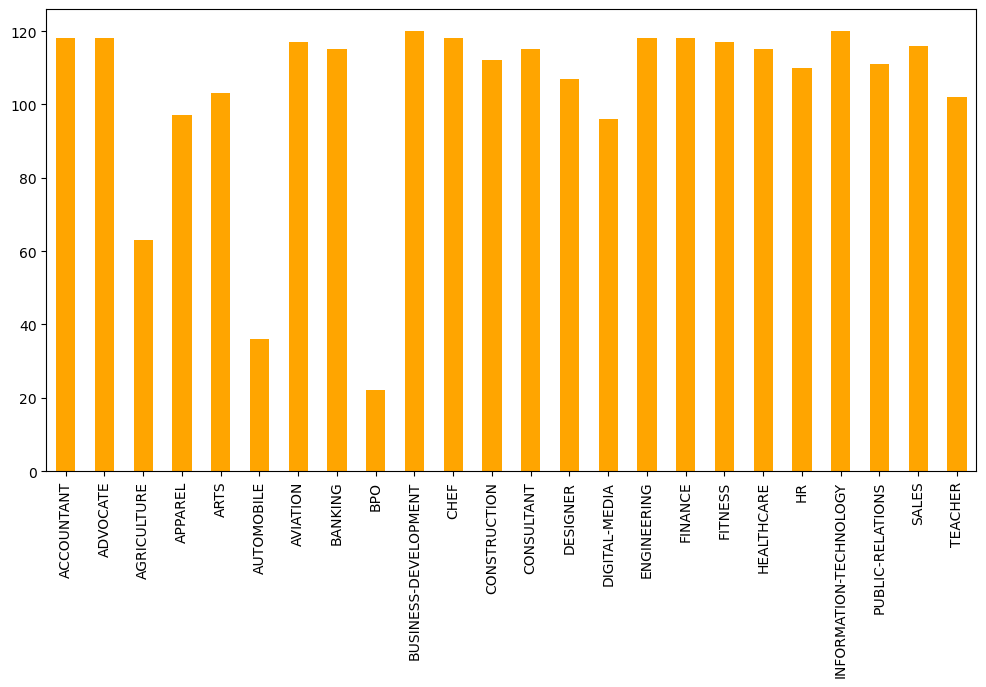

In [143]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='orange')
plt.show()

In [144]:
# Define stopwords list
stopwords_list = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function for text cleaning and lemmatization
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Cleaning and lemmatization
    clean_lemmatized_text = [lemmatizer.lemmatize(token.lower()) for token in tokens if (token.lower() not in punctuation) and (token.lower() not in stopwords_list) and (len(token) > 2) and token.isalpha()]
    return " ".join(clean_lemmatized_text)

# Apply text preprocessing to the 'Research_Paper_Text' column
df['Resume'] = df['Resume'].apply(preprocess_text)

In [145]:
df.head()

,Resume,Category
0,associate administrator summary dedicated cust...,HR
1,specialist operation summary versatile medium ...,HR
2,director summary year experience recruiting pl...,HR
3,specialist summary dedicated driven dynamic ye...,HR
4,manager skill highlight skill department start...,HR


In [146]:
X = df['Resume']
y = df['Category']

In [147]:
le = preprocessing.LabelEncoder()
le.fit(y)
classes = list(enumerate(le.classes_))
print(classes)
y = le.transform(y)
y

[(0, 'ACCOUNTANT'), (1, 'ADVOCATE'), (2, 'AGRICULTURE'), (3, 'APPAREL'), (4, 'ARTS'), (5, 'AUTOMOBILE'), (6, 'AVIATION'), (7, 'BANKING'), (8, 'BPO'), (9, 'BUSINESS-DEVELOPMENT'), (10, 'CHEF'), (11, 'CONSTRUCTION'), (12, 'CONSULTANT'), (13, 'DESIGNER'), (14, 'DIGITAL-MEDIA'), (15, 'ENGINEERING'), (16, 'FINANCE'), (17, 'FITNESS'), (18, 'HEALTHCARE'), (19, 'HR'), (20, 'INFORMATION-TECHNOLOGY'), (21, 'PUBLIC-RELATIONS'), (22, 'SALES'), (23, 'TEACHER')]


array([19, 19, 19, ...,  6,  6,  6])

In [148]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
X_train.shape, y_train.shape

((1738,), (1738,))

In [150]:
y_train

array([ 3, 20,  9, ..., 12, 14, 17])

In [151]:
#Vectorizing the text data using TF-IDF
tfidf_vect = TfidfVectorizer() 
X_train = tfidf_vect.fit_transform(X_train)

In [152]:
X_train.shape

(1738, 26405)

In [153]:
X_test = tfidf_vect.transform(X_test)

In [154]:
X_train.shape, X_test.shape

((1738, 26405), (746, 26405))

In [155]:
# These data sets are "sparse matrix". We can't see them unless we convert using toarray()
np.set_printoptions(precision=3)
print(X_train.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [156]:
#svd
svd = TruncatedSVD(n_components=400, n_iter=10) #n_components is the number of topics, which should be less than the number of features, and number of rows in the matrix

X_train_dim_reduct = svd.fit_transform(X_train)
X_test__dim_reduct = svd.transform(X_test)

In [157]:
X_train_dim_reduct.shape, X_test__dim_reduct.shape

((1738, 400), (746, 400))

In [158]:
X_train_dim_reduct

array([[ 0.311, -0.068,  0.117, ...,  0.001,  0.003,  0.043],
       [ 0.216, -0.032, -0.177, ...,  0.012, -0.002, -0.001],
       [ 0.325, -0.008,  0.118, ..., -0.028, -0.042,  0.031],
       ...,
       [ 0.244, -0.082, -0.159, ...,  0.009,  0.045,  0.068],
       [ 0.405,  0.115, -0.028, ...,  0.003,  0.01 ,  0.023],
       [ 0.443,  0.058,  0.136, ...,  0.031, -0.02 , -0.003]])

In [159]:
df = pd.DataFrame(X_train_dim_reduct, columns=[f"svd{num:04}" for num in range(0,X_train_dim_reduct.shape[1])])
df

,svd0000,svd0001,svd0002,svd0003,svd0004,svd0005,svd0006,svd0007,svd0008,svd0009,...,svd0390,svd0391,svd0392,svd0393,svd0394,svd0395,svd0396,svd0397,svd0398,svd0399
0,0.311491,-0.067528,0.116964,0.026999,-0.024010,-0.081325,-0.023909,-0.016245,0.011992,-0.052861,...,0.012256,-0.075003,-0.000595,-0.001458,0.011328,-0.036073,0.006821,0.000614,0.003463,0.043352
1,0.216065,-0.031873,-0.176659,-0.121737,-0.107376,-0.039652,-0.104384,-0.008093,-0.125989,-0.075991,...,0.002948,0.009670,0.006315,-0.023799,-0.000828,-0.008537,-0.042381,0.011569,-0.002357,-0.001305
2,0.325053,-0.007819,0.118395,-0.056552,-0.003996,-0.120124,0.205269,-0.001905,0.061949,-0.177760,...,0.006313,-0.003215,0.019733,0.022370,0.011351,-0.002275,-0.022506,-0.028022,-0.041938,0.030656
3,0.231388,-0.021662,-0.092271,-0.077731,-0.115348,0.028296,-0.042032,0.007174,0.293128,0.148655,...,-0.004361,0.000964,-0.008242,0.016902,-0.002503,-0.011706,-0.002770,-0.027340,0.010161,0.011514
4,0.145243,-0.029960,-0.021777,-0.073601,-0.010965,0.020620,-0.020737,0.022930,0.045768,0.043949,...,-0.011998,-0.003548,-0.006924,0.040288,0.041082,-0.026411,0.049221,-0.011828,0.008046,0.047682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,0.198125,-0.063810,-0.072340,0.042990,-0.023883,0.041730,-0.087916,0.028105,0.107631,0.030451,...,-0.031820,-0.018721,0.008898,-0.048573,-0.027447,0.013145,-0.001129,0.031305,-0.045018,0.028114
1734,0.270266,-0.024713,0.133116,-0.019631,0.059421,-0.086987,-0.072509,-0.040677,-0.006486,-0.053891,...,-0.018027,0.035067,0.000713,-0.021989,0.010263,-0.033697,-0.012108,-0.027947,-0.025371,-0.011314
1735,0.243734,-0.082350,-0.158967,0.183417,0.027994,0.084516,-0.023474,0.056643,0.002350,-0.002755,...,0.008112,0.027010,0.052056,-0.032319,-0.041511,0.022707,0.022244,0.008831,0.044809,0.068246
1736,0.404854,0.114721,-0.028004,-0.062186,0.023494,0.006908,-0.055002,0.033052,0.043399,-0.107273,...,-0.020708,0.018220,0.014852,-0.014185,0.042775,-0.005422,-0.022588,0.003289,0.010077,0.023034


## Model Building

### Sequential Model 1

In [160]:
# Create a sequential model
model = keras.models.Sequential()

model.add(Dense(400, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(24, activation='softmax'))

# Compile the model using sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train_dim_reduct, y_train, epochs=50, validation_data=(X_test__dim_reduct, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1515 - loss: 3.1404 - val_accuracy: 0.3700 - val_loss: 2.9473
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4847 - loss: 2.7598 - val_accuracy: 0.4799 - val_loss: 2.3184
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6508 - loss: 1.9164 - val_accuracy: 0.5845 - val_loss: 1.7123
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7337 - loss: 1.2788 - val_accuracy: 0.5952 - val_loss: 1.5019
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8002 - loss: 0.8902 - val_accuracy: 0.6072 - val_loss: 1.3947
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8459 - loss: 0.6689 - val_accuracy: 0.6113 - val_loss: 1.3792
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8861 - loss: 0.5446 - val_accuracy: 0.6247 - val_loss: 1.3639
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9180 - loss: 0.4304 - val_accuracy: 0.6233 - val_loss:

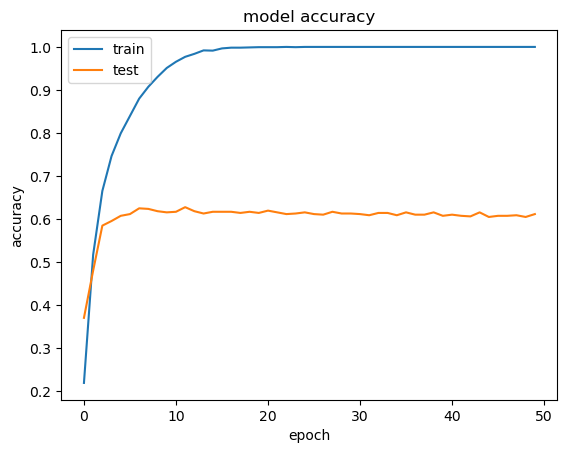

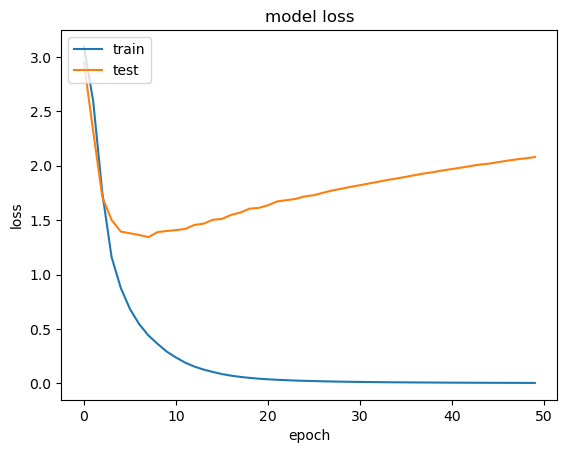

In [161]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [162]:
# Print model summary
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 50)             │        20,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 24)             │         1,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,024 (2.08 MB)

 Trainable params: 181,674 (709.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 363,350 (1.39 MB)

In [163]:
# Predictions
y_pred = model.predict(X_test__dim_reduct)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.46      0.57      0.51        37
           2       0.33      0.20      0.25        15
           3       0.43      0.45      0.44        29
           4       0.32      0.28      0.30        29
           5       0.33      0.27      0.30        11
           6       0.73      0.86      0.79        35
           7       0.56      0.62      0.59        29
           8       0.25      0.25      0.25         4
           9       0.53      0.54      0.54        35
          10       1.00      0.72      0.84        40
          11       0.83      0.79      0.81        43
          12       0.43      0.45      0.44        33
          13       0.77      0.70      0.73        33
          14       0.82      0.51      0.63        35
          15       0.53      0.57      0.55        30
          16       0.67      0.63      0

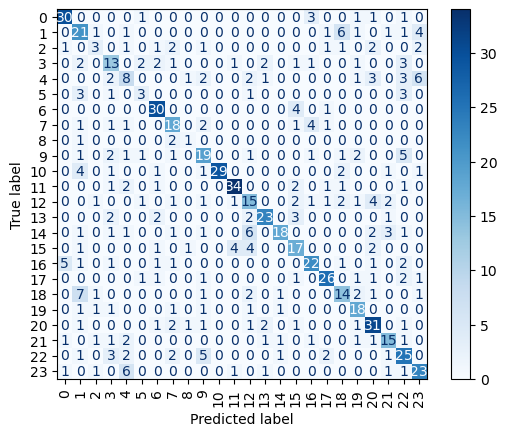

In [164]:
# display the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

### Model 2 ( Combination of Deep and Wide Neural Network )

In [165]:
#Combination 1
# Define input shape
input_shape = X_train_dim_reduct.shape[1:]
# Define the deep branch
deep_branch = Sequential([
    Dense(400, activation='relu'),
    Dense(200, activation='relu')
])
# Define the wide branch
wide_branch = Sequential([
    Dense(50, activation='relu')
])
# Define input layer
input_layer = Input(shape=input_shape)
# Pass input through deep and wide branch
deep_output = deep_branch(input_layer)
wide_output = wide_branch(input_layer)

# Concatenate deep and wide branches
concatenated = Concatenate()([deep_output, wide_output])
# Output layer
output = Dense(24, activation='softmax')(concatenated)

wide_deep_model = Model(inputs=input_layer, outputs=output)
wide_deep_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = wide_deep_model.fit(X_train_dim_reduct, y_train, epochs=50, validation_data=(X_test__dim_reduct, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1941 - loss: 3.1126 - val_accuracy: 0.4920 - val_loss: 2.7117
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6091 - loss: 2.3311 - val_accuracy: 0.5764 - val_loss: 1.7175
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7221 - loss: 1.2611 - val_accuracy: 0.5965 - val_loss: 1.4499
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8232 - loss: 0.7904 - val_accuracy: 0.6233 - val_loss: 1.3509
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8582 - loss: 0.5941 - val_accuracy: 0.6206 - val_loss: 1.3369
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9040 - loss: 0.4338 - val_accuracy: 0.6247 - val_loss: 1.2985
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9402 - loss: 0.3005 - val_accuracy: 0.6099 - val_loss: 1.3649
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9672 - loss: 0.2246 - val_accuracy: 0.6139 - val_loss:

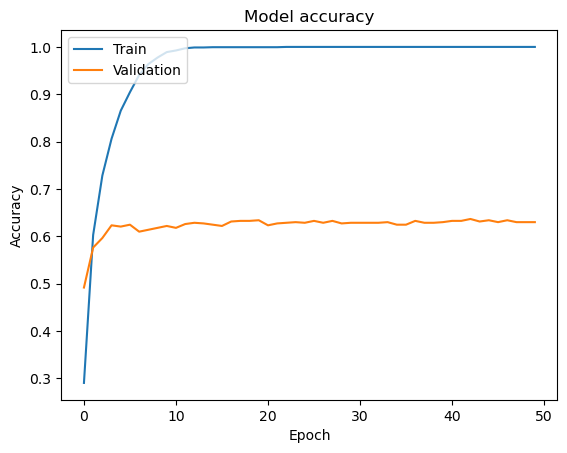

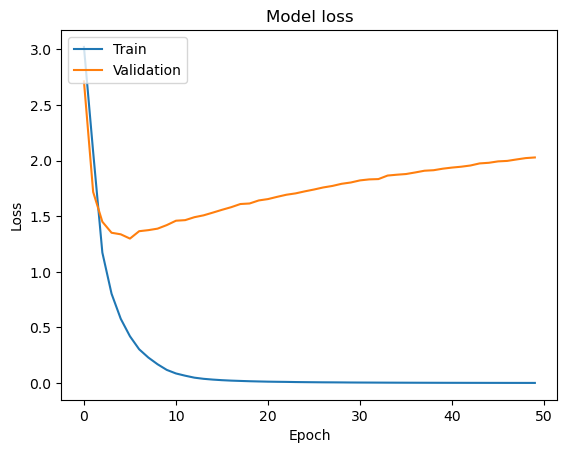

In [166]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [167]:
# Print model summary
wide_deep_model.summary()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33      │ (None, 400)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_24       │ (None, 200)       │    240,600 │ input_layer_33[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_25       │ (None, 50)        │     20,050 │ input_layer_33[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 250)       │          0 │ sequential_24[0]… │
│ (Concatenate)       │                   │            │ sequential_25[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 24)        │      6,024 │ concatenate_9[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 800,024 (3.05 MB)

 Trainable params: 266,674 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 533,350 (2.03 MB)

In [168]:
# Predictions
y_pred = wide_deep_model.predict(X_test__dim_reduct)
y_pred_classes = np.argmax(y_pred, axis=1)
# Print classification report
print(classification_report(y_test, y_pred_classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.50      0.57      0.53        37
           2       0.33      0.27      0.30        15
           3       0.56      0.52      0.54        29
           4       0.36      0.31      0.33        29
           5       0.30      0.27      0.29        11
           6       0.79      0.86      0.82        35
           7       0.69      0.69      0.69        29
           8       0.25      0.25      0.25         4
           9       0.51      0.57      0.54        35
          10       0.93      0.70      0.80        40
          11       0.82      0.77      0.80        43
          12       0.59      0.48      0.53        33
          13       0.81      0.79      0.80        33
          14       0.77      0.66      0.71        35
          15       0.55      0.60      0.57        30
          16       0.63      0.63      0.

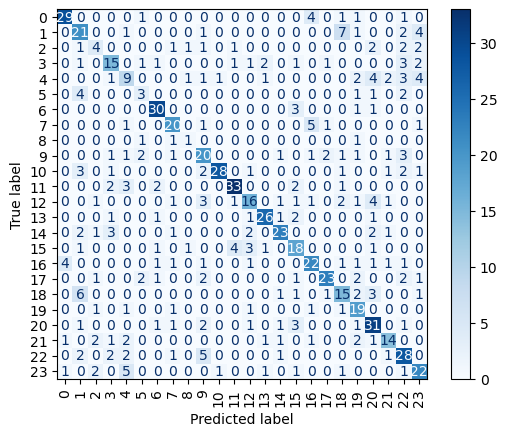

In [169]:
# display the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

### Model 3 ( Combination of Deep and Wide Neural Network )

In [170]:
#Combination 2 
# Define input shape
input_shape = X_train_dim_reduct.shape[1:]
# Define the deep branch
deep_branch = Sequential([
    Dense(400, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu')
])
# Define the wide branch
wide_branch = Sequential([
    Dense(50, activation='relu')
])
# Define input layer
input_layer = Input(shape=input_shape)

# Pass input through deep and wide branch
deep_output = deep_branch(input_layer)
wide_output = wide_branch(input_layer)


concatenated = Concatenate()([deep_output, wide_output])
# Output layer
output = Dense(24, activation='softmax')(concatenated)
wide_deep_model = Model(inputs=input_layer, outputs=output)

wide_deep_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = wide_deep_model.fit(X_train_dim_reduct, y_train, epochs=50, validation_data=(X_test__dim_reduct, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1179 - loss: 3.1255 - val_accuracy: 0.4477 - val_loss: 2.6377
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5015 - loss: 2.2087 - val_accuracy: 0.5483 - val_loss: 1.6690
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 1.1626 - val_accuracy: 0.5697 - val_loss: 1.5165
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.8027 - val_accuracy: 0.5992 - val_loss: 1.4600
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.5377 - val_accuracy: 0.5791 - val_loss: 1.5117
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9069 - loss: 0.3908 - val_accuracy: 0.5818 - val_loss: 1.5659
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9514 - loss: 0.2691 - val_accuracy: 0.6180 - val_loss: 1.5432
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.1707 - val_accuracy: 0.6019 - val_loss:

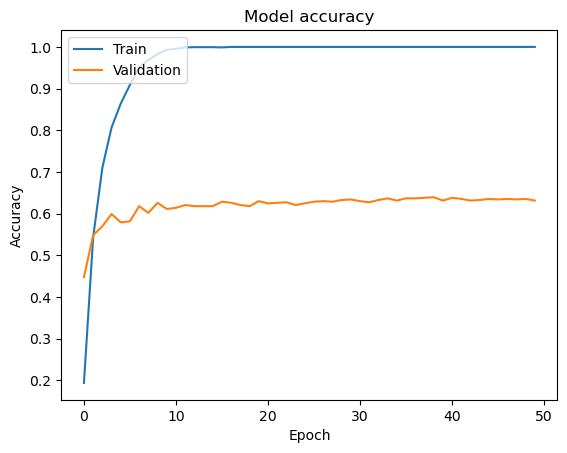

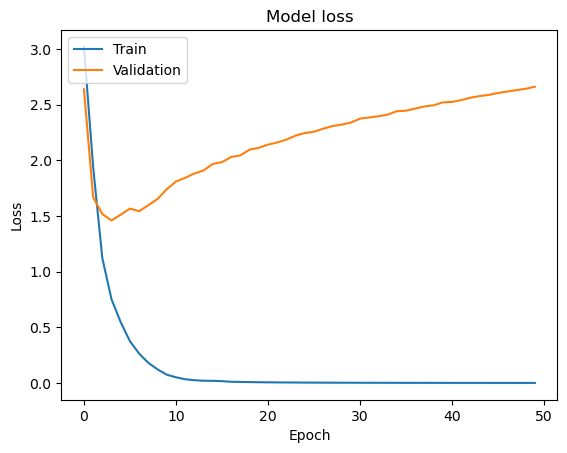

In [171]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [172]:
# Print model summary
wide_deep_model.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 400)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_26       │ (None, 100)       │    260,700 │ input_layer_36[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_27       │ (None, 50)        │     20,050 │ input_layer_36[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 150)       │          0 │ sequential_26[0]… │
│ (Concatenate)       │                   │            │ sequential_27[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 24)        │      3,624 │ concatenate_10[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 853,124 (3.25 MB)

 Trainable params: 284,374 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 568,750 (2.17 MB)

In [173]:
# Predictions
y_pred = model.predict(X_test__dim_reduct)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.46      0.57      0.51        37
           2       0.33      0.20      0.25        15
           3       0.43      0.45      0.44        29
           4       0.32      0.28      0.30        29
           5       0.33      0.27      0.30        11
           6       0.73      0.86      0.79        35
           7       0.56      0.62      0.59        29
           8       0.25      0.25      0.25         4
           9       0.53      0.54      0.54        35
          10       1.00      0.72      0.84        40
          11       0.83      0.79      0.81        43
          12       0.43      0.45      0.44        33
          13       0.77      0.70      0.73        33
          14       0.82      0.51      0.63        35
          15       0.53      0.57      0.55        30
          16       0.67      0.63      0

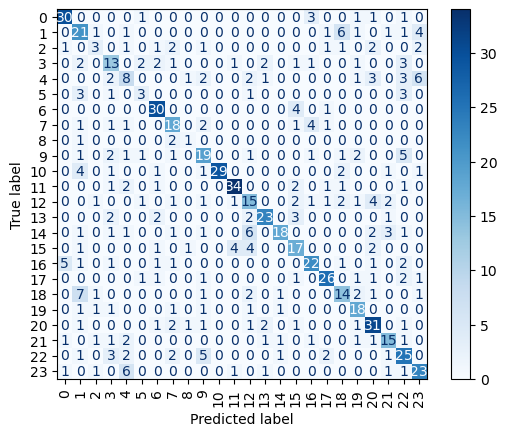

In [174]:
# display the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

### Model 4 ( Combination of Deep and Wide Neural Network )

In [175]:
#Combination 3 
# Define input shape
input_shape = X_train_dim_reduct.shape[1:]

# Define the deep branch
deep_branch = Sequential([
    Dense(500, activation='relu'),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu')
])
# Define the wide branch
wide_branch = Sequential([
    Dense(100, activation='relu'),
    Dense(50, activation='relu')
])
# Define input layer
input_layer = Input(shape=input_shape)


deep_output = deep_branch(input_layer)
wide_output = wide_branch(input_layer)

# Concatenate deep and wide branches
concatenated = Concatenate()([deep_output, wide_output])
# Output layer
output = Dense(24, activation='softmax')(concatenated)
# Create wide and deep model
wide_deep_model = Model(inputs=input_layer, outputs=output)
# Compile the model
wide_deep_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = wide_deep_model.fit(X_train_dim_reduct, y_train, epochs=50, validation_data=(X_test__dim_reduct, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1668 - loss: 3.0558 - val_accuracy: 0.4383 - val_loss: 1.9670
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5221 - loss: 1.5942 - val_accuracy: 0.5442 - val_loss: 1.5956
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7644 - loss: 0.8553 - val_accuracy: 0.5643 - val_loss: 1.4843
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8594 - loss: 0.5266 - val_accuracy: 0.5764 - val_loss: 1.6835
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9309 - loss: 0.2924 - val_accuracy: 0.6059 - val_loss: 1.6466
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.1508 - val_accuracy: 0.5965 - val_loss: 1.7448
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.1221 - val_accuracy: 0.6072 - val_loss: 1.8632
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0390 - val_accuracy: 0.5885 - val_loss:

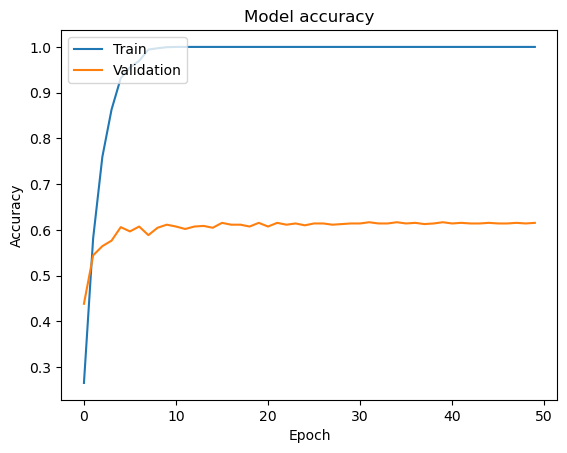

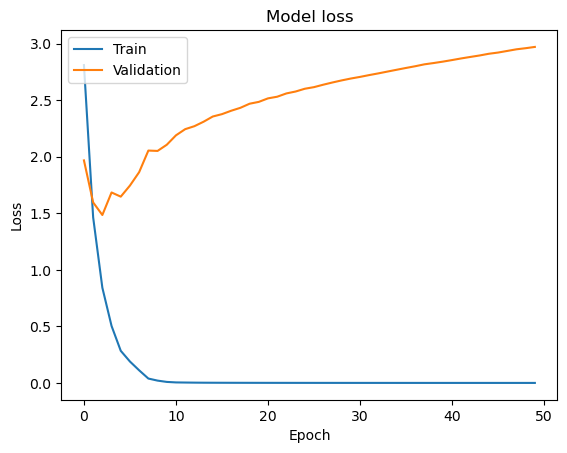

In [176]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [177]:
# Print model summary
wide_deep_model.summary()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39      │ (None, 400)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_28       │ (None, 200)       │    581,400 │ input_layer_39[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_29       │ (None, 50)        │     45,150 │ input_layer_39[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 250)       │          0 │ sequential_28[0]… │
│ (Concatenate)       │                   │            │ sequential_29[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_78 (Dense)    │ (None, 24)        │      6,024 │ concatenate_11[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,897,724 (7.24 MB)

 Trainable params: 632,574 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,265,150 (4.83 MB)

In [178]:
# Predictions
y_pred = model.predict(X_test__dim_reduct)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.46      0.57      0.51        37
           2       0.33      0.20      0.25        15
           3       0.43      0.45      0.44        29
           4       0.32      0.28      0.30        29
           5       0.33      0.27      0.30        11
           6       0.73      0.86      0.79        35
           7       0.56      0.62      0.59        29
           8       0.25      0.25      0.25         4
           9       0.53      0.54      0.54        35
          10       1.00      0.72      0.84        40
          11       0.83      0.79      0.81        43
          12       0.43      0.45      0.44        33
          13       0.77      0.70      0.73        33
          14       0.82      0.51      0.63        35
          15       0.53      0.57      0.55        30
          16       0.67      0.63      0

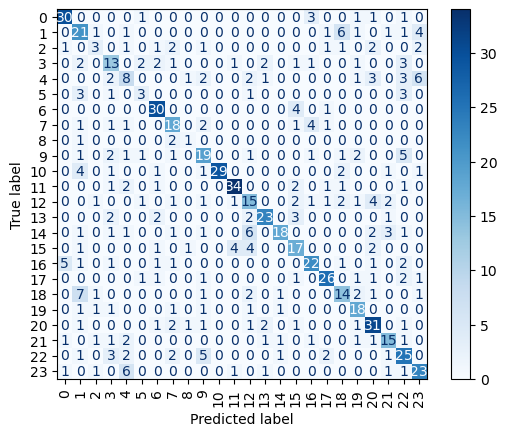

In [179]:
# display the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

# Model Comparison and Conclusion

To analyze the performance of the four models and decide which one performed the best, we have compared them based on their F1 score and accuracy metrics. Additionally, we have interpreted the training history graphs to understand how the models are training and whether more or less training might be beneficial.

## Model Performance Comparison:

#### F1 Score and Accuracy:
- **Model 1 (Simple Sequential)**:
  - F1 Score: 0.63
  - Accuracy: 0.64

- **Model 2 (Combination 1)**:
  - F1 Score: 0.61
  - Accuracy: 0.61

- **Model 3 (Combination 2)**:
  - F1 Score: 0.64
  - Accuracy: 0.64

- **Model 4 (Combination 3)**:
  - F1 Score: 0.64
  - Accuracy: 0.64

### Interpretation of Training History Graphs and epochs:
- **Model 1 (Simple Sequential)**:
  - Achieved a final accuracy of 63.54% on the validation set after 50 epochs.
  - Showed steady improvement in both training and validation accuracy over first 20 epochs and then had a plateau.
  - Despite reaching a decent accuracy, there might be room for further improvement, as indicated by the plateauing of the validation accuracy towards the end of training.

- **Model 2 (Combination 1)**:
  - The training and validation curves seem to plateau early on, suggesting that the model may not be learning effectively. The performance is lower compared to the simple sequential model.
  - Reached a validation accuracy of 60.99% after 50 epochs.
  - Demonstrated consistent fluctuations in test data till epoch 30 and then had a plateau.

- **Model 3 (Combination 2)**:
  - Shows similar behavior to Model 1 with consistent improvement in accuracy over epochs for both training and validation sets. However, the performance is slightly better than the simple sequential model.
  - Achieved a validation accuracy of 60.05% after 50 epochs.
  - Plateaued around 20 epoch similar to sequential model.
  - The model's performance indicates potential for further optimization, as suggested by the relatively slow convergence of the validation accuracy.

- **Model 4 (Combination 3)**:
  - Like Model 1 and Model 3, it exhibits consistent improvement in accuracy over epochs for both training and validation sets.
  - Plateaued around 30 epoch.
  - Performed quite similar to model 1 and model 3.

## Conclusion:
- **Best Performing Model**: Model 3 (Combination 2) and Model 4 (Combination 3) achieved the highest F1 score and accuracy.
- **Training History Interpretation**: Models 1, 3, and 4 show signs of effective learning with consistent improvement in accuracy over epochs. Model 2, however, seems to plateau early, indicating potential underfitting.
- **Recommendation**: Models 3 and 4 show promise with both high F1 scores and accuracy. Further tuning and training might help improve the performance marginally. Model 1, despite performing well, might benefit from fine-tuning or exploring more complex architectures. Model 2 might require significant adjustments to improve its performance.

In conclusion, Models 3 and 4, utilizing combinations of wide and deep architectures, show the best performance among the tested models. Further experimentation and fine-tuning could potentially enhance the performance even more.